# Denoising Auto Encoder

In [20]:
from keras.layers import Input, Dense
from keras.models import Model

In [21]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input=input_img, output=decoded)

In [22]:
# this model maps an input to its encoded representation
encoder = Model(input=input_img, output=encoded)

In [23]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

In [24]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [25]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data() #grid에 흑백의 진하기 정도에 대한 값 + label

In [26]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [27]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [28]:
autoencoder.fit(x_train_noisy, x_train,
                nb_epoch=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s - loss: 0.3470 - val_loss: 0.2681
Epoch 2/100
60000/60000 [==============================] - 6s - loss: 0.2667 - val_loss: 0.2646
Epoch 3/100
60000/60000 [==============================] - 6s - loss: 0.2625 - val_loss: 0.2588
Epoch 4/100
60000/60000 [==============================] - 7s - loss: 0.2543 - val_loss: 0.2476
Epoch 5/100
60000/60000 [==============================] - 6s - loss: 0.2413 - val_loss: 0.2336
Epoch 6/100
60000/60000 [==============================] - 6s - loss: 0.2286 - val_loss: 0.2221
Epoch 7/100
60000/60000 [==============================] - 6s - loss: 0.2185 - val_loss: 0.2131
Epoch 8/100
60000/60000 [==============================] - 7s - loss: 0.2103 - val_loss: 0.2052
Epoch 9/100
60000/60000 [==============================] - 6s - loss: 0.2030 - val_loss: 0.1984
Epoch 10/100
60000/60000 [==============================] - 7s - loss: 0.1969 - val_lo

In [29]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

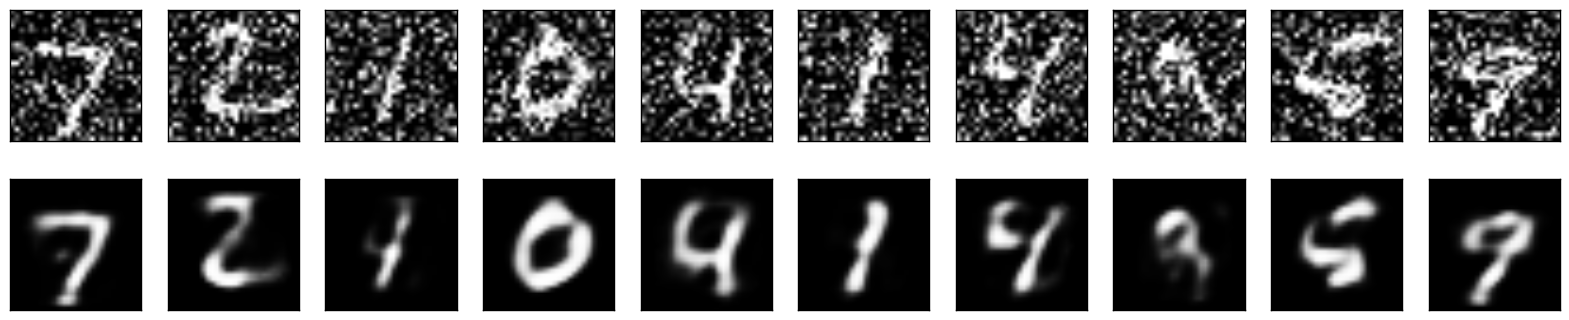

In [30]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()